In [1]:
import random
import glob
import os
import joblib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KernelDensity

In [2]:
SIZE = 16
BATCH_SIZE = 50
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = datagen.flow_from_directory(
    r'D:\DATASET\Anamoly_Detection\dataset\Dataset_train'
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input'
)

validation_generator = datagen.flow_from_directory(
    r'D:\DATASET\Anamoly_Detection\dataset\Dataset_val',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input'
)

anomaly_generator = datagen.flow_from_directory(
    r'D:\DATASET\Anamoly_Detection\dataset\Dataset_test',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input'
)

Found 7000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.
Found 2000 images belonging to 1 classes.


In [4]:
train_folder = r'D:\DATASET\Anamoly_Detection\dataset\Dataset_train\train'
test_folder = r'D:\DATASET\Anamoly_Detection\dataset\Dataset_test\test'
val_folder = r'D:\DATASET\Anamoly_Detection\dataset\Dataset_val\val'

num_train_images = len([name for name in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, name))])
num_test_images = len([name for name in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, name))])
num_val_images = len([name for name in os.listdir(val_folder) if os.path.isfile(os.path.join(val_folder, name))])

print("Number of training images:", num_train_images)
print("Number of testing images:", num_test_images)
print("Number of validation images:", num_val_images)


Number of training images: 7000
Number of testing images: 2000
Number of validation images: 1000


In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=6,
    shuffle=True
)

# Save the model
model.save('autoencoder_model.h5')

Epoch 1/100
20/20 [==============================] - 13s 163ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 2/100
20/20 [==============================] - 3s 137ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 3/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.4446e-04 - val_mse: 6.4446e-04
Epoch 5/100
20/20 [==============================] - 2s 88ms/step - loss: 5.5838e-04 - mse: 5.5838e-04 - val_loss: 5.1513e-04 - val_mse: 5.1513e-04
Epoch 6/100
20/20 [==============================] - 2s 78ms/step - loss: 4.9810e-04 - mse: 4.9810e-04 - val_loss: 4.8519e-04 - val_mse: 4.8519e-04
Epoch 7/100
20/20 [==============================] - 1s 72ms/step - loss: 4.7965e-04 - mse: 4.7965e-04 - val_loss: 4.7456e-04 - val_mse: 4.7456e-04
Epoch 8/100
20/

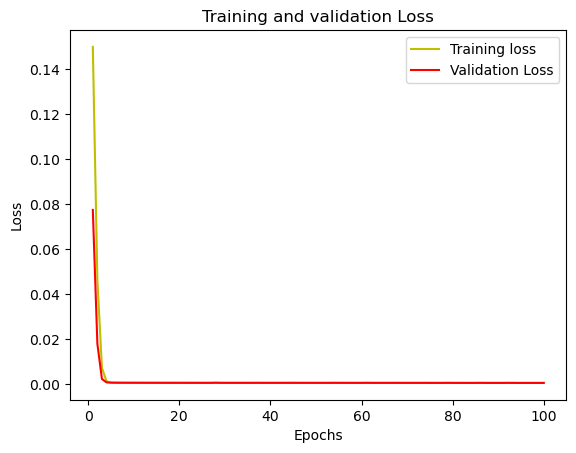

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


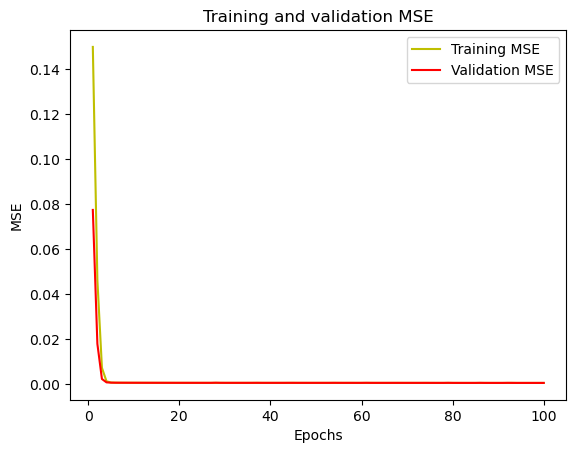

In [8]:
mse = history.history['mse'] 
val_mse = history.history['val_mse']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mse, 'y', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [9]:

data_batch = []
img_num = 0
while img_num <= train_generator.batch_index:
    data = train_generator.next()
    data_batch.append(data[0])
    img_num += 1

predicted = model.predict(data_batch[0])


2/2 [==============================] - 1s 291ms/step


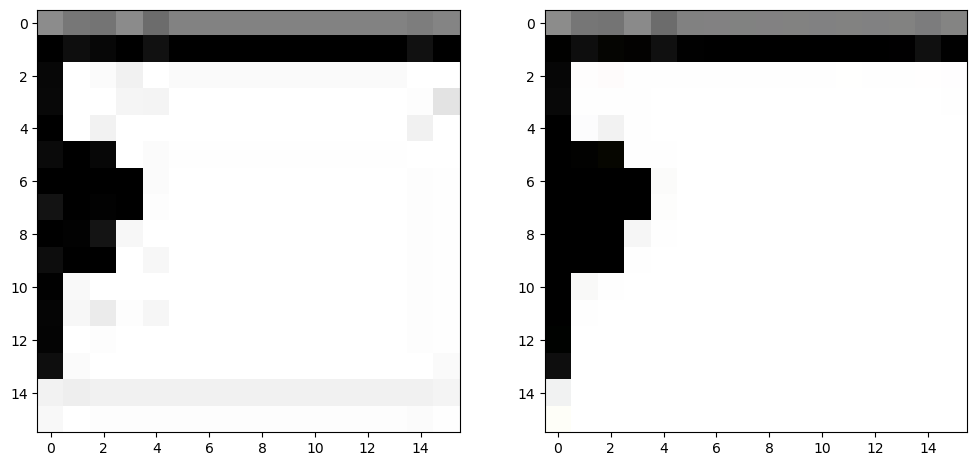

40/40 [==============================] - 5s 114ms/step - loss: 0.5004 - mse: 0.5004


In [10]:
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

validation_error = model.evaluate(validation_generator)
anomaly_error = model.evaluate(anomaly_generator)


In [11]:
encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same', weights=model.layers[6].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 16)        

In [12]:
encoded_images = encoder_model.predict(train_generator)

encoder_model.save('encoder_model.h5')

140/140 [==============================] - 3s 23ms/step


In [13]:
encoder_output_shape = encoder_model.output_shape
out_vector_shape = encoder_output_shape[1] * encoder_output_shape[2] * encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)



In [14]:
filename = 'kde_model.joblib'
joblib.dump(kde, filename)

['kde_model.joblib']

In [15]:
def calc_density_and_recon_error(batch_images):
    density_list = []
    recon_error_list = []

    for im in range(0, batch_images.shape[0] - 1):
        img = batch_images[im]
        img = img[np.newaxis, :, :, :]
        encoded_img = encoder_model.predict([[img]])
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img]
        density = kde.score_samples(encoded_img)[0]
        
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction], [[img]], batch_size=1)[0]
        
        density_list.append(density)
        recon_error_list.append(reconstruction_error)

    average_density = np.mean(np.array(density_list))
    stdev_density = np.std(np.array(density_list))

    average_recon_error = np.mean(np.array(recon_error_list))
    stdev_recon_error = np.std(np.array(recon_error_list))

    return average_density, stdev_density, average_recon_error, stdev_recon_error

train_batch = train_generator.next()[0]
anomaly_batch = anomaly_generator.next()[0]

noraml_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)

1/1 [==============================] - 0s 34ms/step - loss: 0.5142 - mse: 0.5142
